# 과제2. Mobile 고객 이탈 분석

* 고객 이탈여부(CHURN)에 영향을 주는 요인을 분석하고자 합니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|feature		|
|	INCOME	|	연 수입액(달러)	|feature		|
|	OVERAGE	|	월 초과사용 시간(분)	|feature		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|feature		|
|	HOUSE	|	집 가격(달러)	|feature		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|feature		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|feature		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|feature		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|feature		|
|	**CHURN**	|	**이탈여부(1 : 이탈, 0 : 잔류)**	|	**Target**	|


----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 2개 이상씩, 전체 5개의 feature를 도출, 가설을 수립하시오.

* 가설1
>* 귀무가설 : 대학 졸업 여부에 따라 이탈여부에는 유의미한 차이가 없다.
>* 대립가설 : 대학 졸업 여부에 따라 이탈여부에는 유의미한 차이가 있다.

* 가설2
>* 귀무가설 : 연수입액에 따라 이탈여부에는 유의미한 차이가 없다.
>* 대립가설 : 연수입액에 따라 이탈여부에는 유의미한 차이가 없다.

* 가설3
>* 귀무가설 : 월 사용 잔여시간에 따라 이탈여부에는 유의미한 차이가 없다.
>* 대립가설 : 월 사용 잔여시간에 따라 이탈여부에는 유의미한 차이가 있다.

* 가설4
>* 귀무가설 : 핸드폰 가격에 따라 이탈여부에는 유의미한 차이가 없다.
>* 대립가설 : 핸드폰 가격에 따라 이탈여부에는 유의미한 차이가 있다.

* 가설5
>* 귀무가설 : 만족도에 따른 이탈여부에는 유의미한 차이가 없다.
>* 대립가설 : 만족도에 따른 이탈여부에는 유의미한 차이가 있다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) CHURN(이탈여부)

In [5]:
target = 'CHURN'

① 변수의 비즈니스 의미

* 고객 이탈 여부(yes:1, no:0)

② 숫자, 범주?

* 범주

③ NaN 존재 유무

In [6]:
mobile[target].isna().sum()

0

④ 기초통계량(수치화)

In [7]:
mobile[target].value_counts()

0    9131
1    8869
Name: CHURN, dtype: int64

⑤ 분포 확인(시각화)

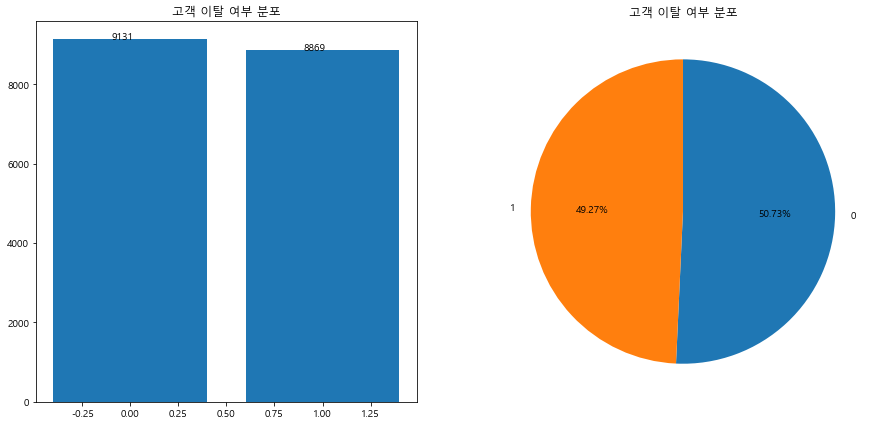

In [8]:
cnt = mobile[target].value_counts()
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.bar(cnt.index, cnt.values)
plt.title('고객 이탈 여부 분포')
for i in range(2):
    plt.text(i-.1, cnt.values[i]+5, cnt.values[i])

plt.subplot(1,2,2)
plt.title('고객 이탈 여부 분포')
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 데이터상 고객이탈여부에 커다란 차이는 보이지 않는다.

⑦ 추가 분석해 볼 사항이 있나요?

* 데이터를 이탈 데이터와 잔류 데이터로 나누고 추가분석하여 차이점을 찾아내 고객 잔류를 위한 알맞은 전략을 수립해야한다.

### 2) COLLEGE(대학졸업여부)

In [9]:
var = 'COLLEGE'

① 변수의 비즈니스 의미

* 고객 대학 졸업 여부(yes :1, no :0) 

② 숫자, 범주?

* 범주

③ NaN 존재 유무

In [10]:
mobile[var].isna().sum()

0

④ 기초통계량(수치화)

In [11]:
mobile[var].value_counts()

1    9049
0    8951
Name: COLLEGE, dtype: int64

⑤ 분포 확인(시각화)

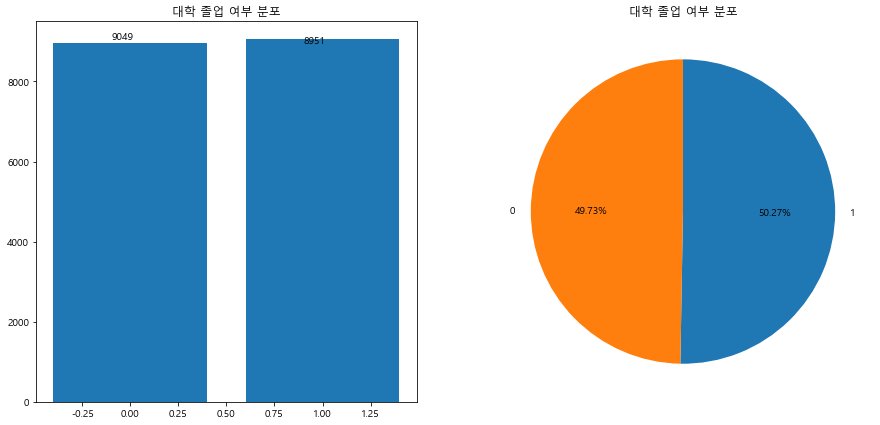

In [15]:
cnt = mobile[var].value_counts()
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.bar(cnt.index, cnt.values)
plt.title('대학 졸업 여부 분포')
for i in range(2):
    plt.text(i-.1, cnt.values[i]+10, cnt.values[i])

plt.subplot(1,2,2)
plt.title('대학 졸업 여부 분포')
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 데이터 분포상 유의미한 차이는 나타나지 않는다.

⑦ 추가 분석해 볼 사항이 있나요?

* 졸업 유무로 데이터를 나누어 고객이탈여부와의 관계를 추가분석해볼 필요가 있다.

### 3) INCOME(연수입액)

In [16]:
var = 'INCOME'

① 변수의 비즈니스 의미

* 고객의 연 수입액

② 숫자, 범주?

* 숫자

③ NaN 존재 유무

In [17]:
mobile[var].isna().sum()

0

④ 기초통계량(수치화)

In [18]:
mobile[var].describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

⑤ 분포 확인(시각화)

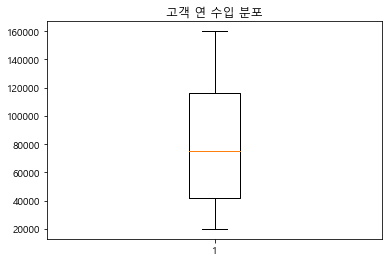

[42151.5 20007. ]
[116082.25 159983.  ]


In [19]:
box = plt.boxplot(mobile[var])
plt.title('고객 연 수입 분포')
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

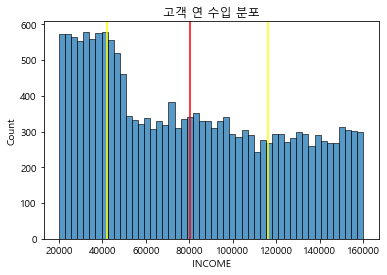

In [29]:
sns.histplot(mobile[var], bins=50)
plt.title('고객 연 수입 분포')
plt.axvline(mobile[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

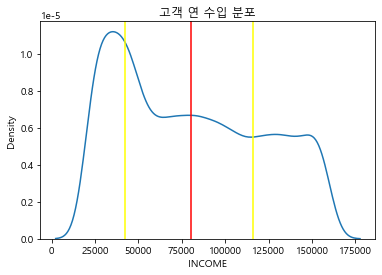

In [28]:
sns.kdeplot(mobile[var])
plt.title('고객 연 수입 분포')
plt.axvline(mobile[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 데이터 분포가 약간 왼쪽으로 치우쳐있으나 대체로 고르게 분포되어 있다.

⑦ 추가 분석해 볼 사항이 있나요?

* 대략 50000달러를 기준으로 빈도수가 급격하게 변하는 것으로 볼때 데이터를 나누어 비교분석해볼 필요가 있다.

### 4) LEFTOVER	(월 사용 잔여시간[분])

In [30]:
var = 'LEFTOVER'

① 변수의 비즈니스 의미

* 고객의 월 사용 잔여시간

② 숫자, 범주?

* 숫자

③ NaN 존재 유무

In [32]:
mobile[var].isna().sum()

0

④ 기초통계량(수치화)

In [33]:
mobile[var].describe()

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

⑤ 분포 확인(시각화)

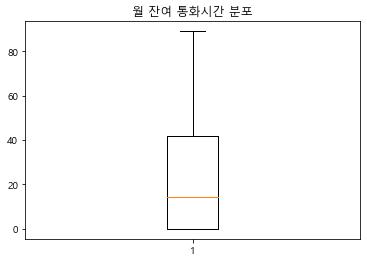

[0. 0.]
[42. 89.]


In [36]:
box = plt.boxplot(mobile[var])
plt.title('월 잔여 통화시간 분포')
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

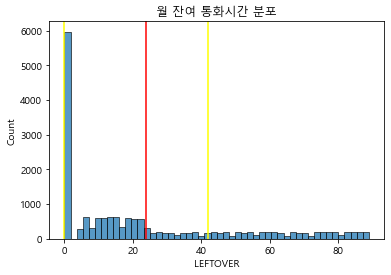

In [37]:
sns.histplot(mobile[var], bins=50)
plt.title('월 잔여 통화시간 분포')
plt.axvline(mobile[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

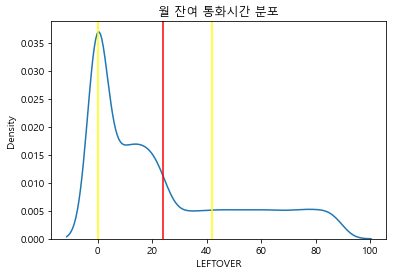

In [38]:
sns.kdeplot(mobile[var])
plt.title('월 잔여 통화시간 분포')
plt.axvline(mobile[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 잔여시간이 전혀 남아있지 않은 고객이 전체의 25%를 차지하며 이 부분이 이탈여부와 관련이 있는지 분석해 보아야한다.
* 그래프가 전체적으로 왼쪽으로 치우친 경향이 있어 고객들에게 제공되는 통화시간이 부족한 것은 아닌지 추가 조사가 필요한다.

⑦ 추가 분석해 볼 사항이 있나요?

* 잔여시간이 0인 사람들과 아닌사람들을 나누어 비교분석할 필요가 있다.

### 5) HANDSET_PRICE(핸드폰 가격)

In [51]:
var = 'HANDSET_PRICE'

① 변수의 비즈니스 의미

* 고객의 핸드폰 가격

② 숫자, 범주?

* 숫자

③ NaN 존재 유무

In [40]:
mobile[var].isna().sum()

0

④ 기초통계량(수치화)

In [41]:
mobile[var].describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

⑤ 분포 확인(시각화)

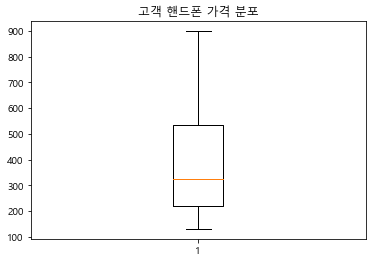

[219. 130.]
[536. 899.]


In [52]:
box = plt.boxplot(mobile[var])
plt.title('고객 핸드폰 가격 분포')
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

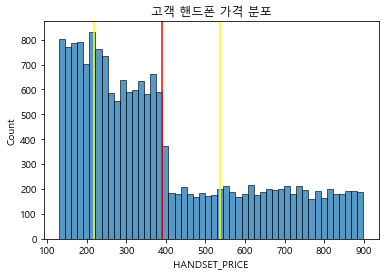

In [53]:
sns.histplot(mobile[var], bins=50)
plt.title('고객 핸드폰 가격 분포')
plt.axvline(mobile[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

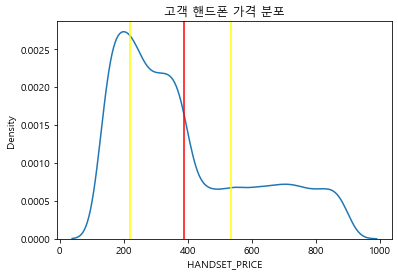

In [54]:
sns.kdeplot(mobile[var])
plt.title('고객 핸드폰 가격 분포')
plt.axvline(mobile[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 고객의 50%가 326달러 이하의 핸드폰을 사용하고 있고 이는 평균보다 낮은 수치로 대체로 저가 핸드폰을 사용한다고 볼 수 있다.

⑦ 추가 분석해 볼 사항이 있나요?

* 평균선을 기준으로 빈도수가 급격하게 변화하기 때문에 고객 데이터를 두가지로 나누어 분석해볼 필요가 있다.

### 6) REPORTED_SATISFACTION(만족도 설문)

In [92]:
var = 'REPORTED_SATISFACTION'

① 변수의 비즈니스 의미

* 고객 만족도('매우불만', '불만', '보통', '만족', '매우만족')

② 숫자, 범주?

* 범주

③ NaN 존재 유무

In [93]:
mobile[var].isna().sum()

38

* 결측치 처리
* 데이터에 비해 많은수가 아니기 때문에 행제거

In [108]:
mobile2 = mobile.copy()

In [113]:
mobile2 = mobile2.loc[mobile2[var].notnull()]

④ 기초통계량(수치화)

In [114]:
mobile2[var].value_counts()

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64

⑤ 분포 확인(시각화)

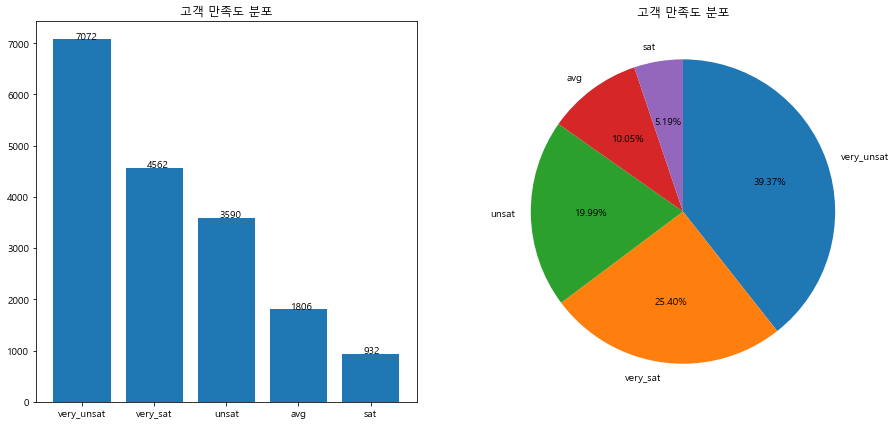

In [115]:
cnt = mobile2[var].value_counts()
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.bar(cnt.index, cnt.values)
plt.title('고객 만족도 분포')
for i in range(5):
    plt.text(i-.1, cnt.values[i]+10, cnt.values[i])

plt.subplot(1,2,2)
plt.title('고객 만족도 분포')
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 결측치가 존재하기 때문에 결측치를 고려한 분석이 필요하다.
* 만족하지 못하는 비율이 전체의 60%가량을 차지하고 있기 때문에 전략적인 개선이 필요할 것으로 보인다.

⑦ 추가 분석해 볼 사항이 있나요?

* 만족하는 고객과 불만족하는 고객을 나누어 분석해볼 필요가 있다.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [56]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

In [55]:
# 전체 이탈율
total_mean = mobile[target].mean()
print(total_mean)

0.49272222222222223


#### 1) COLLEGE --> CHURN

In [57]:
var = 'COLLEGE'

① 교차표(pd.crosstab())

In [61]:
pd.crosstab(mobile[var], mobile[target])

CHURN,0,1
COLLEGE,,
0,4616,4335
1,4515,4534


② 시각화( Stacked Bar, Mosaic)

In [62]:
temp = pd.crosstab(mobile[var], mobile[target], normalize='index')
print(temp)

CHURN           0         1
COLLEGE                    
0        0.515697  0.484303
1        0.498950  0.501050


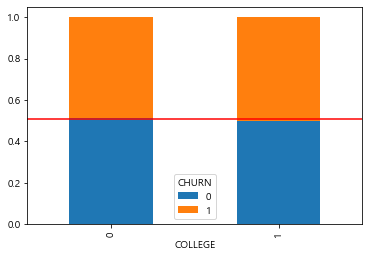

In [64]:
temp.plot.bar(stacked=True)
plt.axhline(1-mobile[target].mean(), color='r')
plt.show()

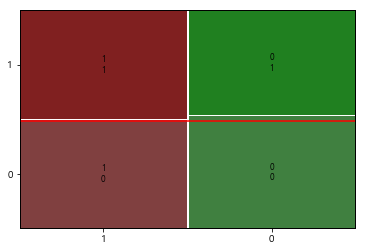

In [65]:
mosaic(mobile, [var, target])
plt.axhline(mobile[target].mean(), color='r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 그래프상 대학여부와 고객이탈여부는 유의미한 차이를 보이지 않는다.

③ 가설검정(카이제곱검정)

In [66]:
table = pd.crosstab(mobile[var], mobile[target])
print(table)
print('-'*100)
result = spst.chi2_contingency(table)
print('카이제곱 통계량 : ', result[0])
print('P-value : ', result[1])
print('기대빈도 : ', result[3])

CHURN       0     1
COLLEGE            
0        4616  4335
1        4515  4534
----------------------------------------------------------------------------------------------------
카이제곱 통계량 :  4.982102934693502
P-value :  0.02561083347822053
기대빈도 :  [[4540.64338889 4410.35661111]
 [4590.35661111 4458.64338889]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 검정결과 유의수준 0.05에서는 차이가 있지만 0.01에서는 차이가 없는 것으로 볼때 대학여부와 이탈여부는 관계가 매우 적다.

#### 2) REPORTED_SATISFACTION --> CHURN

In [116]:
var = 'REPORTED_SATISFACTION'

① 교차표(pd.crosstab())

In [117]:
pd.crosstab(mobile2[var], mobile2[target])

CHURN,0,1
REPORTED_SATISFACTION,,
avg,952,854
sat,492,440
unsat,1792,1798
very_sat,2334,2228
very_unsat,3543,3529


② 시각화( Stacked Bar, Mosaic)

In [118]:
temp = pd.crosstab(mobile2[var], mobile2[target], normalize='index')
print(temp)

CHURN                         0         1
REPORTED_SATISFACTION                    
avg                    0.527132  0.472868
sat                    0.527897  0.472103
unsat                  0.499164  0.500836
very_sat               0.511618  0.488382
very_unsat             0.500990  0.499010


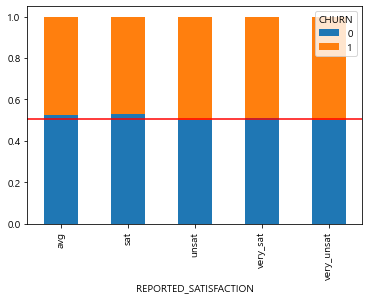

In [119]:
temp.plot.bar(stacked=True)
plt.axhline(1-mobile2[target].mean(), color='r')
plt.show()

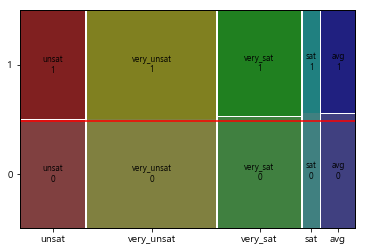

In [120]:
mosaic(mobile2, [var, target])
plt.axhline(mobile2[target].mean(), color='r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 그래프 분포를 보았을 때 만족도와 고객이탈여부는 유의미한 차이가 보이지 않는다.

③ 가설검정(카이제곱검정)

In [121]:
table = pd.crosstab(mobile2[var], mobile2[target])
print(table)
print('-'*100)
result = spst.chi2_contingency(table)
print('카이제곱 통계량 : ', result[0])
print('P-value : ', result[1])
print('기대빈도 : ', result[3])

CHURN                     0     1
REPORTED_SATISFACTION            
avg                     952   854
sat                     492   440
unsat                  1792  1798
very_sat               2334  2228
very_unsat             3543  3529
----------------------------------------------------------------------------------------------------
카이제곱 통계량 :  6.841100957205645
P-value :  0.14452738878905058
기대빈도 :  [[ 916.27201871  889.72798129]
 [ 472.84912593  459.15087407]
 [1821.38236277 1768.61763723]
 [2314.5254426  2247.4745574 ]
 [3587.97104999 3484.02895001]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 검정결과 유의수준 0.05 이상으로 만족도와 고객이탈여부는 관련이 없다.

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) INCOME --> CHURN


In [74]:
var = 'INCOME'

① 그래프 : histogram, densityplot

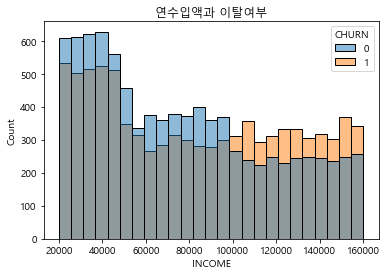

In [81]:
sns.histplot(x=var, hue=target, data=mobile)
plt.title('연수입액과 이탈여부')
plt.show()

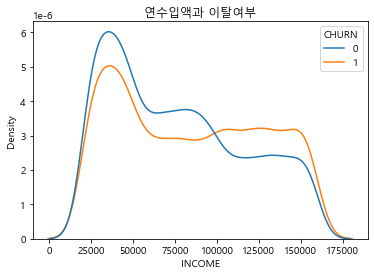

In [82]:
sns.kdeplot(x=var, hue=target, data=mobile)
plt.title('연수입액과 이탈여부')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 대략 수입이 95000~100000달러인 고객들을 기준으로 이탈이 더욱 많이 발생한다.
* 이탈이 더 많아지는 부분을 기점으로 데이터를 분리하여 추가분석할 필요가 있다.

② 수치화 : 로지스틱회귀

In [80]:
model = sm.Logit(mobile[target], mobile[var])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* p-value 값이 충분히 작기때문에 연수입에 따른 고객의 이탈여부는 유의미한 차이가 있다.

#### 2) LEFTOVER --> CHURN


In [83]:
var = 'LEFTOVER'

① 그래프 : histogram, densityplot

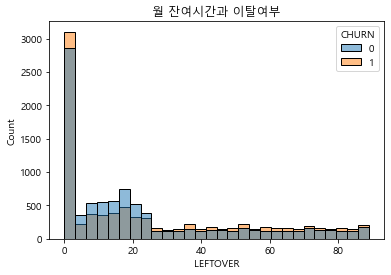

In [84]:
sns.histplot(x=var, hue=target, data=mobile)
plt.title('월 잔여시간과 이탈여부')
plt.show()

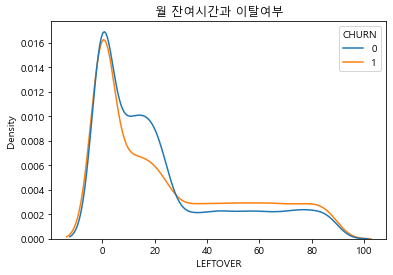

In [85]:
sns.kdeplot(x=var, hue=target, data=mobile)
plt.title('월 잔여시간과 이탈여부')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 잔여시간이 없는 고객들을 제외하고 대략 25분정도 잔여시간이 있는 고객들은 잔류하는 고객이 이탈하는 고객보다 많다.

② 수치화 : 로지스틱회귀

In [86]:
model = sm.Logit(mobile[target], mobile[var])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 유의수준이 충분히 작기때문에 잔여시간에 따른 고객의 이탈여부에는 유의미한 차이가 있다.

#### 3) HANDSET_PRICE --> CHURN


In [87]:
var = 'HANDSET_PRICE'

① 그래프 : histogram, densityplot

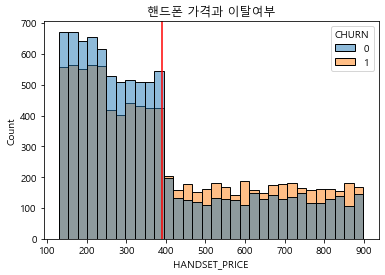

In [90]:
sns.histplot(x=var, hue=target, data=mobile)
plt.title('핸드폰 가격과 이탈여부')
plt.axvline(mobile[var].mean(), color='r')
plt.show()

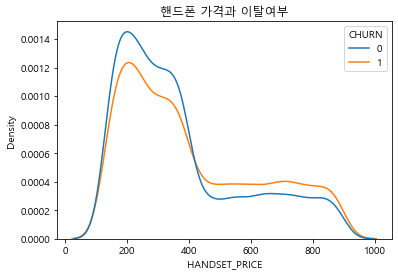

In [89]:
sns.kdeplot(x=var, hue=target, data=mobile)
plt.title('핸드폰 가격과 이탈여부')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 대략 평균선을 기준으로 빈도수가 급격하게 변하는데 그에 따른 이탈여부에 차이도 큰것으로 보인다.

② 수치화 : 로지스틱회귀

In [91]:
model = sm.Logit(mobile[target], mobile[var])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 유의수준이 충분히 작기 때문에 핸드폰가격에 따른 이탈여부에는 유의미한 차이가 있다.

## 4.관계 정리

### 1) 강한관계의 변수

월 초과사용시간, 집가격

### 2) 약한관계의 변수

연수입액, 핸드폰 가격, 월 잔여시간, 평균통화시간

### 3) 관계 없음

고객 만족도, 대학 졸업 여부, 변경설문계획

## 5.추가 분석

### 7) OVERAGE(월 초과사용시간)

#### 가설설정

* 귀무가설 : 월 초과사용시간(분)에 따른 이탈여부에는 유의미한 차이가 없다.
* 대립가설 : 월 초과사용시간(분)에 따른 이탈여부에는 유의미한 차이가 있다.

In [122]:
var = 'OVERAGE'

In [123]:
mobile[var].isna().sum()

0

In [124]:
mobile[var].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

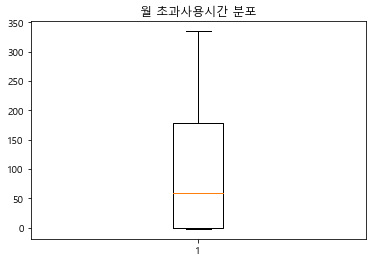

[ 0. -2.]
[179. 335.]


In [125]:
box = plt.boxplot(mobile[var])
plt.title('월 초과사용시간 분포')
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

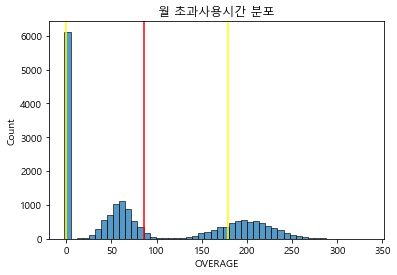

In [127]:
sns.histplot(mobile[var], bins=50)
plt.title('월 초과사용시간 분포')
plt.axvline(mobile[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

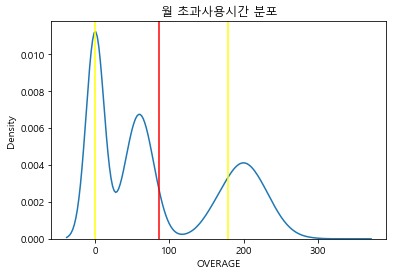

In [129]:
sns.kdeplot(mobile[var])
plt.title('월 초과사용시간 분포')
plt.axvline(mobile[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

* -2라는 사용시간이 나타났기 때문에 이 데이터에 대한 처리방안이 필요하다.
* 고객의 25%가량이 초과사용시간이 0으로 나타났기 때문에 이 데이터를 제외하고 분석해볼 필요가 있다.

##### OVERAGE --> CHURN

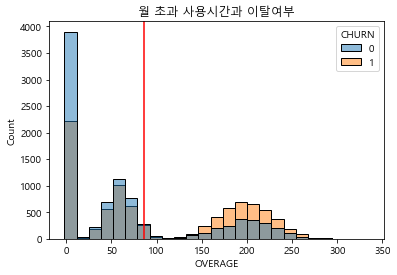

In [131]:
sns.histplot(x=var, hue=target, data=mobile)
plt.title('월 초과 사용시간과 이탈여부')
plt.axvline(mobile[var].mean(), color='r')
plt.show()

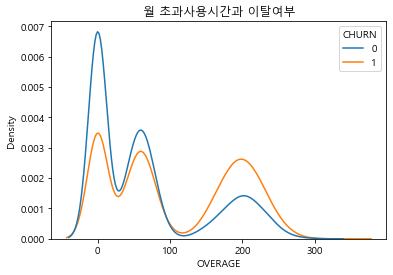

In [132]:
sns.kdeplot(x=var, hue=target, data=mobile)
plt.title('월 초과사용시간과 이탈여부')
plt.show()

* 초과시간 대략 100분정도를 기준으로 이탈여부에 큰차이를 보이고 있다.

In [133]:
model = sm.Logit(mobile[target], mobile[var])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


* 검정결과 월 초과 사용시간과 이탈여부에는 유의미한 차이가 있다.

### 8) HOUSE(집 가격)

#### 가설설정

* 귀무가설 : 집 가격에 따른 이탈여부에는 유의미한 차이가 없다.
* 대립가설 : 집 가격에 따른 이탈여부에는 유의미한 차이가 있다.

In [134]:
var = 'HOUSE'

In [135]:
mobile[var].isna().sum()

215

* 결측치인 데이터의 개수가 적지 않기 때문에 최빈값으로 대체하는 것을 고려한다.

In [142]:
mobile3 = mobile.copy()

In [143]:
mobile3.fillna({var:mobile[var].mode()[0]}, inplace=True)

In [144]:
mobile3[var].isna().sum()

0

In [145]:
mobile3[var].describe()

count     18000.000000
mean     489085.387722
std      253117.692489
min      150015.000000
25%      259092.500000
50%      446412.000000
75%      698473.500000
max      999970.000000
Name: HOUSE, dtype: float64

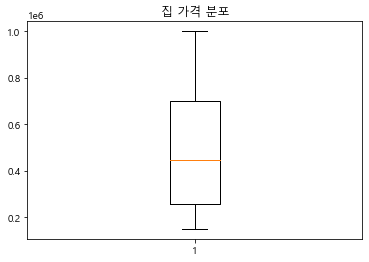

[259092.5 150015. ]
[698473.5 999970. ]


In [152]:
box = plt.boxplot(mobile3[var])
plt.title('집 가격 분포')
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

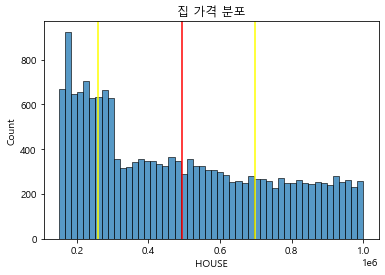

In [154]:
sns.histplot(mobile3[var], bins=50)
plt.title('집 가격 분포')
plt.axvline(mobile[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

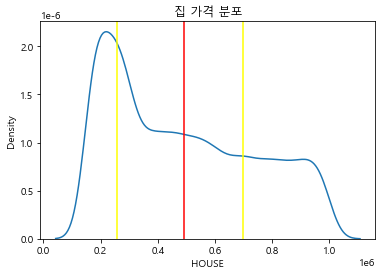

In [156]:
sns.kdeplot(mobile3[var])
plt.title('집 가격 분포')
plt.axvline(mobile[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

* 집가격은 대체로 고르게 분포되어 있으나 300000달러 이하에서 빈도수가 높게 나타난다.

##### HOUSE --> CHURN

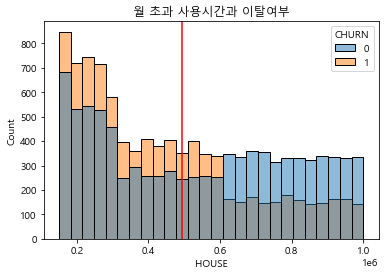

In [161]:
sns.histplot(x=var, hue=target, data=mobile3)
plt.title('월 초과 사용시간과 이탈여부')
plt.axvline(mobile[var].mean(), color='r')
plt.show()

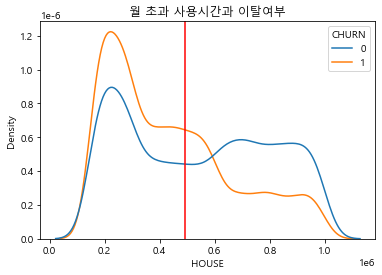

In [159]:
sns.kdeplot(x=var, hue=target, data=mobile3)
plt.title('월 초과 사용시간과 이탈여부')
plt.axvline(mobile[var].mean(), color='r')
plt.show()

* 집 값 600000구간을 기준으로 이탈여부에 두드러지는 차이가 보인다.
* 이탈여부가 바뀌는 구간을 기준으로 나누어 분석을 진행해볼 필요가 있다.

In [157]:
model = sm.Logit(mobile3[target], mobile3[var])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.687308
         Iterations 2
HOUSE    3.850174e-47
dtype: float64


* 검정결과 집 가격에 따른 이탈여부에는 유의미한 차이가 있다.

### 9) AVERAGE_CALL_DURATION(평균 통화시간)

#### 가설설정

* 귀무가설 : 평균 통화시간에 따른 이탈여부에는 유의미한 차이가 없다.
* 대립가설 : 평균 통화시간에 따른 이탈여부에는 유의미한 차이가 있다.

In [162]:
var = 'AVERAGE_CALL_DURATION'

In [163]:
mobile[var].isna().sum()

0

In [164]:
mobile[var].describe()

count    18000.000000
mean         5.990944
std          4.398894
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64

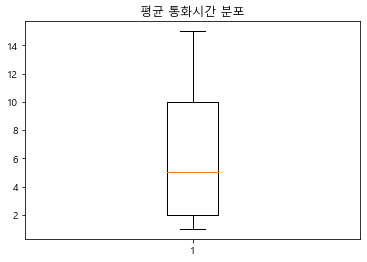

[2. 1.]
[10. 15.]


In [166]:
box = plt.boxplot(mobile[var])
plt.title('평균 통화시간 분포')
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

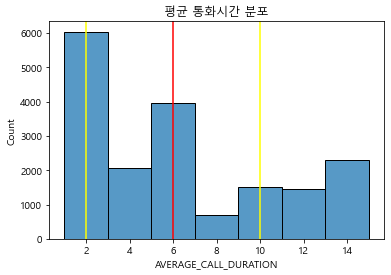

In [174]:
sns.histplot(mobile[var], bins=7)
plt.title('평균 통화시간 분포')
plt.axvline(mobile[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

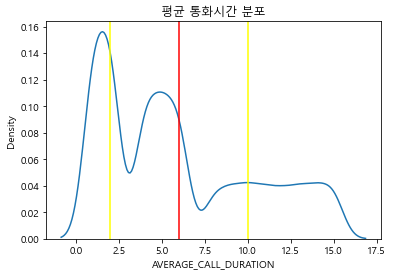

In [177]:
sns.kdeplot(mobile[var])
plt.title('평균 통화시간 분포')
plt.axvline(mobile[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

* 전체의 75%가 평균적으로 10분이내로 통화한다.
* 2분이내로 통화시간이 적은 사람들도 25%가량 존재하는데 그 요인이 무엇인지 분석해볼 필요가 있다.
* 2분이하, 4에서 6분사이, 8분 이상으로 세 집단으로 나누어 분석해볼 필요가 있다.

##### AVERAGE_CALL_DURATION --> CHURN

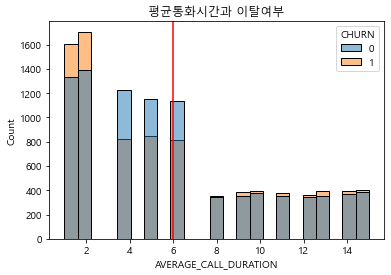

In [178]:
sns.histplot(x=var, hue=target, data=mobile)
plt.title('평균통화시간과 이탈여부')
plt.axvline(mobile[var].mean(), color='r')
plt.show()

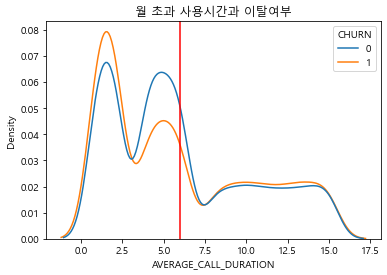

In [179]:
sns.kdeplot(x=var, hue=target, data=mobile3)
plt.title('월 초과 사용시간과 이탈여부')
plt.axvline(mobile[var].mean(), color='r')
plt.show()

* 통화시간이 3~7분사이일 경우를 제외하고는 이탈율이 높다.

In [180]:
model = sm.Logit(mobile3[target], mobile3[var])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


* 유의수준 0.05이하로 평균통화시간과 이탈여부는 관련이 있지만 유의수준 0.01보다는 크기 때문에 보수적으로 보았을때 차이가 있다고 보기는 어렵다.
* 하지만 구간별로 유의미한 차이가 나타나기 때문에 구간별로 나누어 분석해야한다.

### 10) CONSIDERING_CHANGE_OF_PLAN(변경 계획 설문)

#### 가설설정

* 귀무가설 : 변경 계획 설문에 따른 이탈여부에는 유의미한 차이가 없다.
* 대립가설 : 변경 계획 설문에 따른 이탈여부에는 유의미한 차이가 있다.

In [181]:
var = 'CONSIDERING_CHANGE_OF_PLAN'

In [182]:
mobile[var].isna().sum()

0

In [183]:
mobile[var].value_counts()

considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64

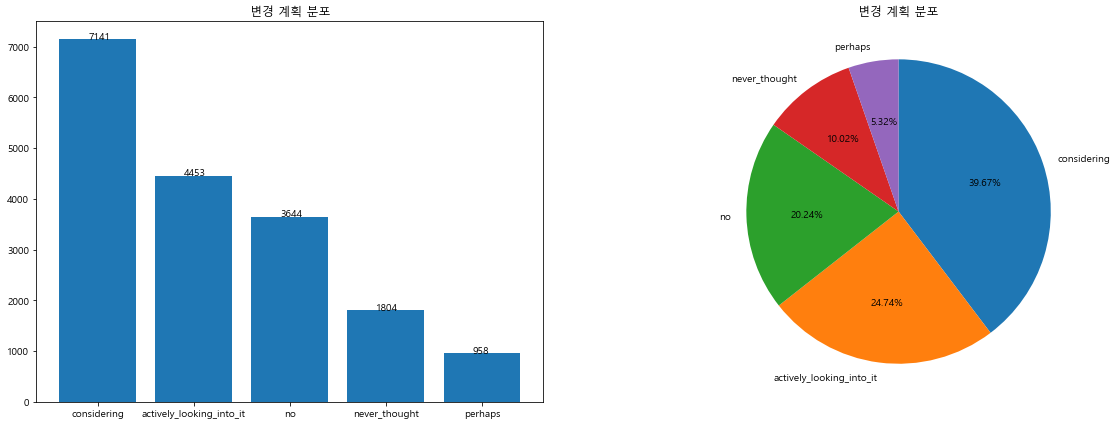

In [185]:
cnt = mobile[var].value_counts()
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.bar(cnt.index, cnt.values)
plt.title('변경 계획 분포')
for i in range(5):
    plt.text(i-.1, cnt.values[i]+10, cnt.values[i])

plt.subplot(1,2,2)
plt.title('변경 계획 분포')
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

* 변경을 생각하고 있는 사람(perhaps, considering, actively)이 70%가량을 차지하고 있다.
* 설문 내용으로 볼때 대부분의 고객들이 변경을 조금이나마 생각하고 있다.

#### CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [186]:
pd.crosstab(mobile[var], mobile[target])

CHURN,0,1
CONSIDERING_CHANGE_OF_PLAN,,
actively_looking_into_it,2278,2175
considering,3648,3493
never_thought,926,878
no,1823,1821
perhaps,456,502


In [187]:
temp = pd.crosstab(mobile[var], mobile[target], normalize='index')
print(temp)

CHURN                              0         1
CONSIDERING_CHANGE_OF_PLAN                    
actively_looking_into_it    0.511565  0.488435
considering                 0.510853  0.489147
never_thought               0.513304  0.486696
no                          0.500274  0.499726
perhaps                     0.475992  0.524008


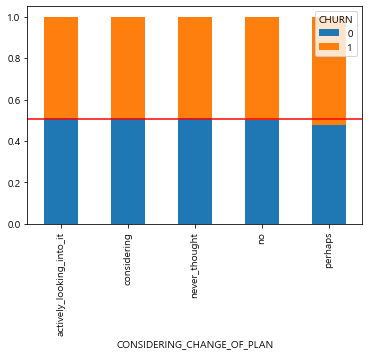

In [188]:
temp.plot.bar(stacked=True)
plt.axhline(1-mobile[target].mean(), color='r')
plt.show()

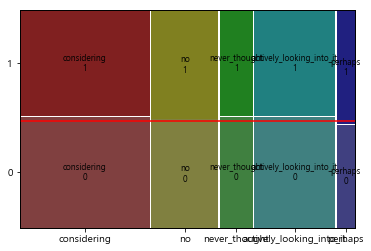

In [189]:
mosaic(mobile2, [var, target])
plt.axhline(mobile2[target].mean(), color='r')
plt.show()

* 그래프를 분석하였을때 변경설문에 따른 유의미한 차이는 보이지 않는다.
* 범주별로 분류하여 비교분석해볼 필요가 있다.

In [190]:
table = pd.crosstab(mobile[var], mobile[target])
print(table)
print('-'*100)
result = spst.chi2_contingency(table)
print('카이제곱 통계량 : ', result[0])
print('P-value : ', result[1])
print('기대빈도 : ', result[3])

CHURN                          0     1
CONSIDERING_CHANGE_OF_PLAN            
actively_looking_into_it    2278  2175
considering                 3648  3493
never_thought                926   878
no                          1823  1821
perhaps                      456   502
----------------------------------------------------------------------------------------------------
카이제곱 통계량 :  5.421434419620688
P-value :  0.24672225866799702
기대빈도 :  [[2258.90794444 2194.09205556]
 [3622.47061111 3518.52938889]
 [ 915.12911111  888.87088889]
 [1848.52022222 1795.47977778]
 [ 485.97211111  472.02788889]]


* 검정결과 변경설문에 따른 이탈여부에는 유의미한 차이가 없다.